# Part II - Effect of Loan Characteristics on Borrowers APR
## by (SANGOTADE IDOWU)



## Investigation Overview


> The main purpose of this project is to summarise the characteristics of variables that can affect the borrowers APR and to get an idea about the relationship among multiple features using summary statistics aand data visualization.



## Dataset Overview

> The dataset consisted of borrower APRs and attributes of 113,937 loans. The attributes included original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio, current loan status etc

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('prosperLoanData.csv')
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df_loan_vis = df_loan[['Occupation', 'LoanStatus','LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus', 'IsBorrowerHomeowner', 'EmploymentStatusDuration']]

# remove data where the borrower APR is not declared
df_loan_vis = df_loan_vis[~df_loan_vis['BorrowerAPR'].isnull()]

# let's convert Prosperity rating and employment status into ordered categorical variables
dict_loan_variable = {'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA'],
                    'EmploymentStatus': ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']}

for var in dict_loan_variable:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = dict_loan_variable[var])
    df_loan_vis[var] = df_loan_vis[var].astype(ordered_var)
# create year column with the month columnn
df_loan_vis['Term_year'] = df_loan_vis['Term']/12
    

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Borrower APR

> The data shows that most of the loans has APR of less than 0.42.the distribution also looks multimodal as the we have peaks values at 0.1, 0.2, 0.3 and between 0.3 and 0.4


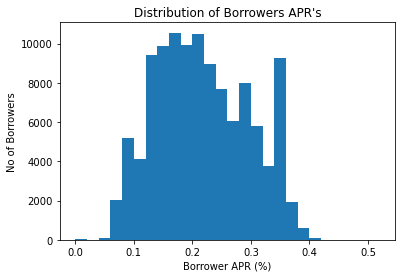

In [4]:
bin_edges = np.arange(0, df_loan_vis['BorrowerAPR'].max() + 0.02, 0.02 ) # Plotting with dynamic bins
sb.distplot(df_loan_vis['BorrowerAPR'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})
plt.xlabel('Borrower APR (%)')
plt.ylabel('No of Borrowers')
plt.title("Distribution of Borrowers APR's")
plt.show()

## Distribution of Loan Amount

> Looking at the data, we have great spikes at 5k, 10k, 15 which means most loans are multiples of 5k

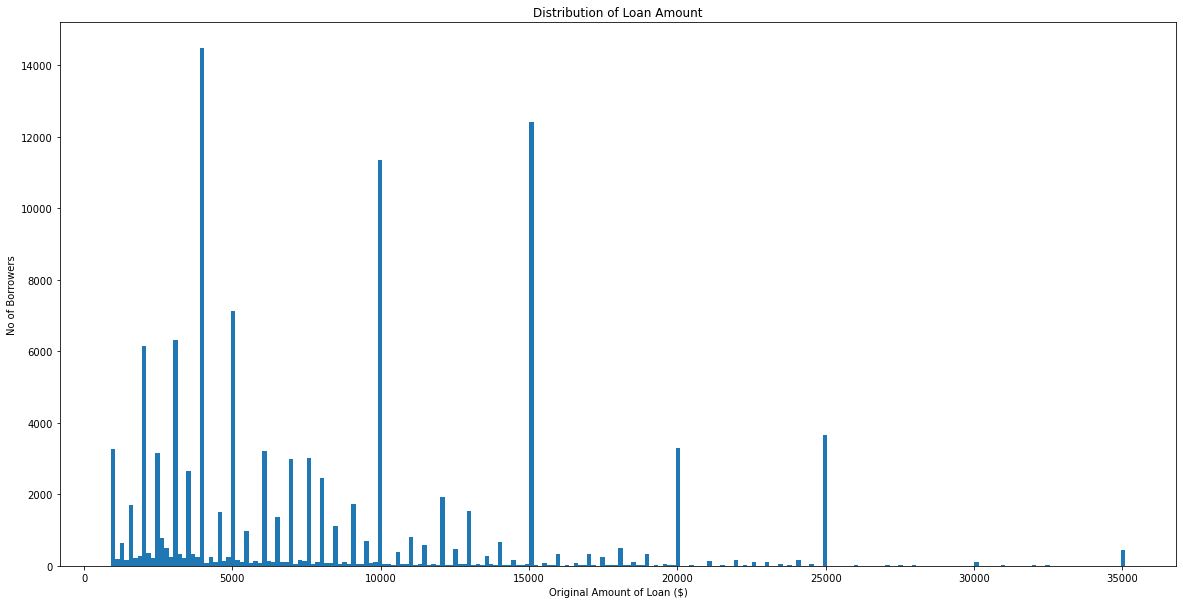

In [5]:
# this data is also numeric, so let use the matplotlib function for plotting histograms
bins_edges = np.arange(900, df_loan_vis.LoanOriginalAmount.max()+150, 150)
plt.figure(figsize=[20, 10])
plt.hist(data = df_loan_vis, x = 'LoanOriginalAmount', bins = bins_edges);
plt.xlabel('Original Amount of Loan ($)')
plt.title('Distribution of Loan Amount')
plt.ylabel('No of Borrowers')
plt.show()

## Bivariate Exploration of Numerical Values
> The Pearson correlation coefficient of borrower APR and loan original amount is -0.3229 which agrees with my prediction earlier, that is the more the loan amount, the lower the APR. The loan original amount is positively correlated with the stated monthly income which makes sense since borrowers with more monthly income can request to loan more money.loan original amount is also positively correlated with employstatus duration which also make sense since i expect that has stayed on job longer will have the higher propensity to pay back there loans



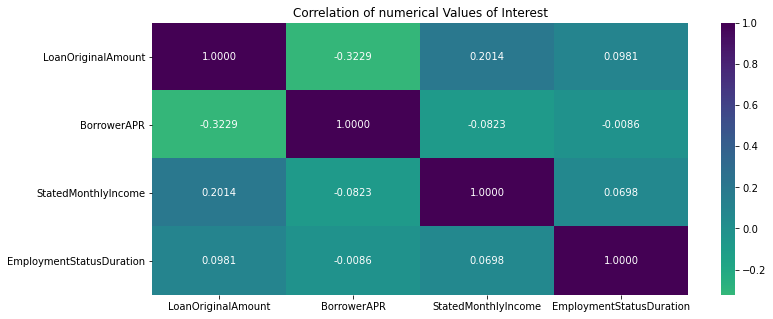

In [8]:
df_numeric_corr = df_loan_vis[['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'EmploymentStatusDuration']]

plt.figure(figsize = [12, 5])
sb.heatmap(df_numeric_corr.corr(), annot = True, fmt = '.4f',
           cmap = 'viridis_r', center = 0);
plt.title('Correlation of numerical Values of Interest')
plt.show()

## Borrower APR against Prosper Rating
> The borrower APR decreases with the better rating. It means that the Prosper rating has a strong effect on borrower APR. Borrowers with better rating also have larger monthly income and loan amount

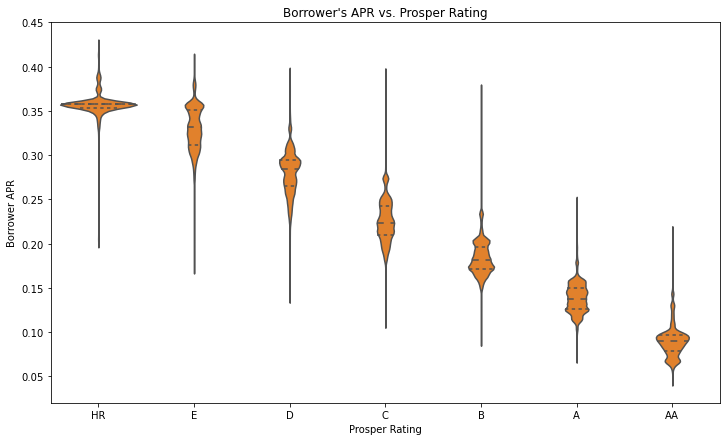

In [9]:
plt.figure(figsize=[12,7])
base_color = sb.color_palette()[1]
sb.violinplot(data=df_loan_vis, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color, inner = "quartile")
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title("Borrower's APR vs. Prosper Rating");

## Borrower APR against Rating and Term
> From the visualization, we can see that borrower APR decrease with the increase of borrow term for people with HR-C prosper ratings. For people with B-AA ratings, the APR increase with the increase of borrower's term

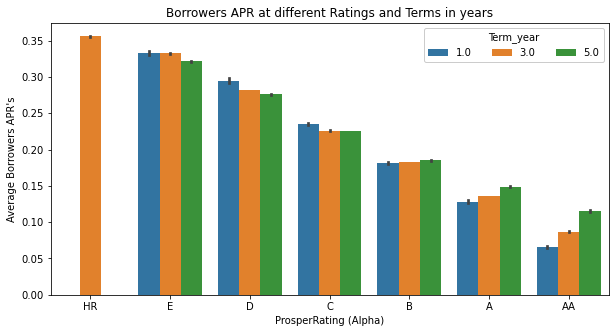

In [10]:
fig = plt.figure(figsize = [10,5])
ax = sb.barplot(data = df_loan_vis, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term_year')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Term_year')
plt.title('Borrowers APR at different Ratings and Terms in years')
plt.ylabel("Average Borrowers APR's")
plt.show()


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [14]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_slide_deck_template_Mayo>.ipynb --to slides --post serve --no-input --no-prompt


The system cannot find the file specified.


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 